<a href="https://colab.research.google.com/gist/annrachman29/63667731fe62b477792883c4dfb110d5/4_tugasai_annisa-rachman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


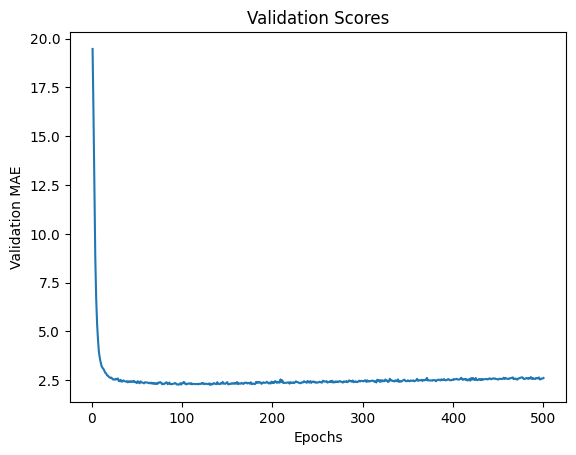

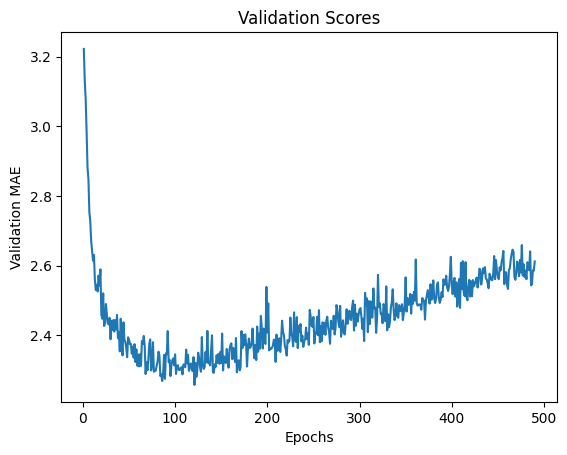

4/4 [==============================] - 0s 3ms/step


array([9.357816], dtype=float32)

In [ ]:
## ANNISA RACHMAN - 2006569963
## No 4 - Predicting House Prices
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers

## The Boston Housing Price Dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape
test_data.shape
train_targets

## Preparing The Data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Building The Model
def build_model():
    model = keras.Sequential([
        layers.Dense(
            64,
            activation="relu"),
        layers.Dense(
            64,
            activation="relu"),
        layers.Dense(1)
    ])
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"])
    return model


## Validating using K-fold Validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples:
        (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:
        (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        batch_size=16,
        verbose=0)
    val_mse, val_mae = model.evaluate(
        val_data,
        val_targets,
        verbose=0)
    all_scores.append(val_mae)


## Running The Model
all_scores
np.mean(all_scores)

## Retraining
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

## Compute MAE Score
average_mae_history = [
    np.mean(
        [x[i] for x in all_mae_histories])
        for i in range(num_epochs)]

## Plotting Validation Scores
plt.plot(
    range(1, len(average_mae_history) + 1),
    average_mae_history)
plt.title('Validation Scores')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

truncated_mae_history = average_mae_history[10:]
plt.plot(range(
    1,
    len(truncated_mae_history) + 1),
    truncated_mae_history)
plt.title('Validation Scores')
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

## Training The FInal Model
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=0)
test_mse_score, test_mae_score = model.evaluate(
    test_data,
    test_targets)

## The Final Result
test_mae_score

## Generating Predictions On New Data
predictions = model.predict(test_data)
predictions[0]